In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
from mpl_toolkits import mplot3d

import scipy.io as scio
import cv2
import math
from scipy.io import loadmat



import random
import seaborn as sns
import torch
import torch.nn
import math
%matplotlib inline
import os


In [5]:
data = np.array([])

name = ['cx','cyy','myj','qyh','zyh']

k = 0
for k in range(5):
    for i in range(10):
        for j in range(22):
            path = os.path.abspath(os.getcwd())+'\\depth_mat' #+'\\'+name[k]+'_a'+str(i+1)+'_t'+str(j+1)
            #path = 'C:\\Users\\root\\depth_mat'+'\\'+name[k]+'_a'+str(i+1)+'_t'+str(j+1)
            files = os.listdir(path)
            for file in files:
                data_array = loadmat(path+'//'+file)
                
        #break

NameError: name 'data_dict' is not defined

In [7]:
x = loadmat('E:\THESIS\CZU-MHAD\depth_mat\cx_a7_t1')

df = pd.DataFrame.from_dict(x, orient='index').T

print("Shape= ", df.shape)
print("Feature Name: ", df.columns)

#print(df.iloc[0]['depth'])

Shape=  (1, 4)
Feature Name:  Index(['__header__', '__version__', '__globals__', 'depth'], dtype='object')


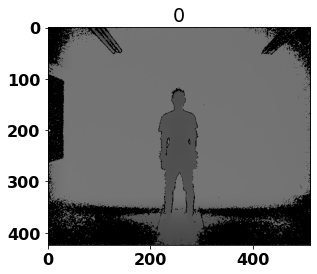

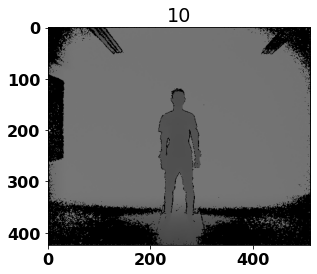

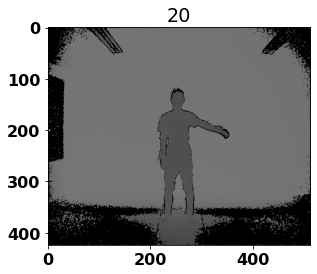

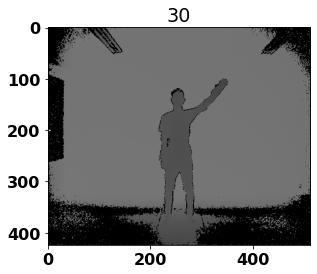

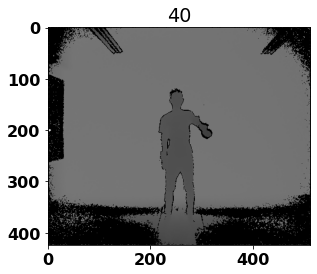

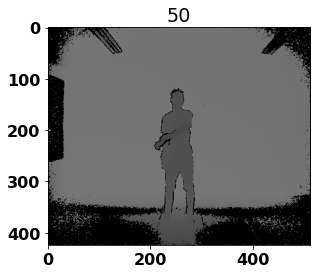

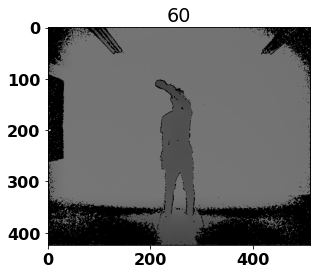

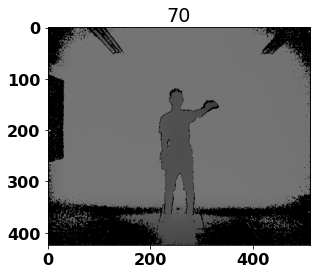

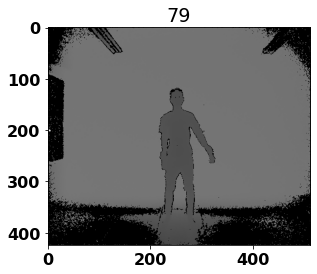

In [58]:
matA = df.iloc[0]['depth']

(num_frame, rows, cols) = matA.shape

cnt=0

for i in range(num_frame):
    A = matA[i, :, :]
    cnt+=1
    #print(A.shape)
    plt.imshow(cv2.cvtColor(A, 0))
    plt.title(i)
    if i%10 == 0: 
        plt.show()


In [42]:
matA.shape

X = matA
(dep, row, col) = X.shape

X_2d = X.reshape(row*col , dep)
X_2d.shape

maxDep = np.amax(X_2d)
maxDep

255

In [7]:
def bounding_box(img):
    
    # Cut out the parts with only background
    
    row, col = img.shape
    
    for i in range (row):
        if (np.sum(img[i,:]) > 0):
            top = i
            break
            
    for i in range (row-1, -1, -1):
        if (np.sum(img[i,:]) > 0):
            bottom = i
            break
            
    for i in range (col):
        if (np.sum(img[:,i]) > 0):
            left = i
            break
                  
    for i in range (col-1, -1, -1):
        if (np.sum(img[:,i]) > 0):
            right = i
            break
    
    y = img[top:bottom, left:right]
                  
    return y

In [8]:
def resize_feature(y,fix_size):
    
    # Min Max Norm
    
    x = y.resize((fix_size),Image.ANTIALIAS)
    x = x.reshape(-1)
    
    mask = x
    if np.min(x) < 0:
        x = x + abs(np.min(x)) * 2

    x[mask==0] = 0
    x = np.divide( (x-np.min(x)) , (np.max(x) - np.min(x)) )
    #x = (x-np.min(x)) ./ (max(x)-min(x));
    
    return x

In [9]:
def abs1(array):
    for i in range(len(array)):
        if (array[i]).any() < 0:
             array[i] = array[i] * (-1)
    return array

In [13]:
def depth_projection(X):

    F = np.zeros((row, col))         # Front
    S = np.zeros((row, maxDep))      # Side
    T = np.zeros((maxDep, col))      # Top

    for k in range(0,dep):
        front = X[k,:,:]
        #print("front {}".format(front))

        front = front.reshape(-1)   # flatten the array to 1d
        #print("front {}".format(front))

        front = front.reshape(row, col)
        side = np.zeros((row, maxDep))  
        top = np.zeros((maxDep, col))

        for i in range(row):
            for j in range(col):
                if front[i][j] != 0:
                    #print("i = {}, j = {}, front[i][j]-1 = {}".format(i,j,front[i,j]-1))
                    side[i,front[i,j]-1] = j   # side view projection (y-z projection)
                    top[front[i,j]-1,j] = i    # top view projection  (x-z projection)
        
        #print("side {}".format(side))
        #print("top {}".format(top))
        
        if k > 0:
            
            F = F + (abs1((front - front_pre)))
            S = S + (abs1((side - side_pre)))
            T = T + (abs1((top - top_pre)))
            '''
            F = F + float ( abs[i] for i in ((front - front_pre)))
            S = S + float ( abs[i] for i in ((side - side_pre)))
            T = T + float ( abs[i] for i in ((top - top_pre)))
            '''
        front_pre = front
        side_pre  = side
        top_pre   = top    
    
    print("side {}".format(S.max()))
    print("front {}".format(F.max()))
    print("top {}".format(T.max()))
    
    F = bounding_box(F)
    S = bounding_box(S)
    T = bounding_box(T)
    
    return (F, S, T)

In [60]:
(F, S, T) = depth_projection(matA)

IndexError: index 80 is out of bounds for axis 0 with size 80

[[12544. 12944. 12032. ...  9083.  8366. 10240.]
 [ 6912.   256.   624. ...  3328.  2479.  2560.]
 [ 8960.   256.   768. ...  2816.  3328.  1536.]
 ...
 [ 8448.     0.     0. ...  1280.   512.  1024.]
 [ 8448.     0.     0. ...  1792.  1536.  1024.]
 [ 4464.     0.     0. ...   768.   768.  1024.]]
(423, 509)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0. 510.   0. ...   0.   0.   0.]
 [  0. 500.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
(423, 186)
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 199.   0. ...   0.   0.   0.]
 [  1. 200. 200. ...   0.   0.   0.]]
(186, 508)


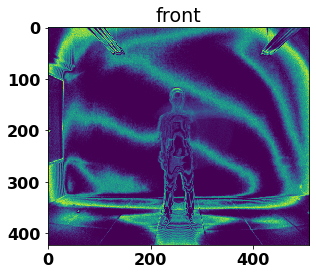

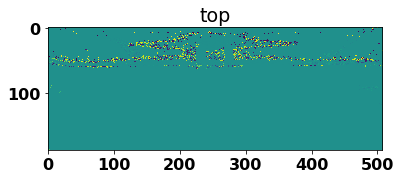

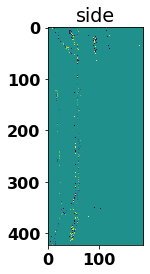

In [55]:
print(F)
print(F.shape)

print(S)
print(S.shape)

print(T)
print(T.shape)

plt.imshow(F, interpolation='nearest')
plt.title("front")
plt.show()

plt.imshow(T, interpolation='nearest')
plt.title("top")
plt.show()

plt.imshow(S, interpolation='nearest')
plt.title("side")
plt.show()

#F.astype('uint8') * 255
#plt.imshow(cv2.cvtColor(T, cv2.COLOR_BGR2RGB))
#cv2.imshow("", y.astype('float32'))


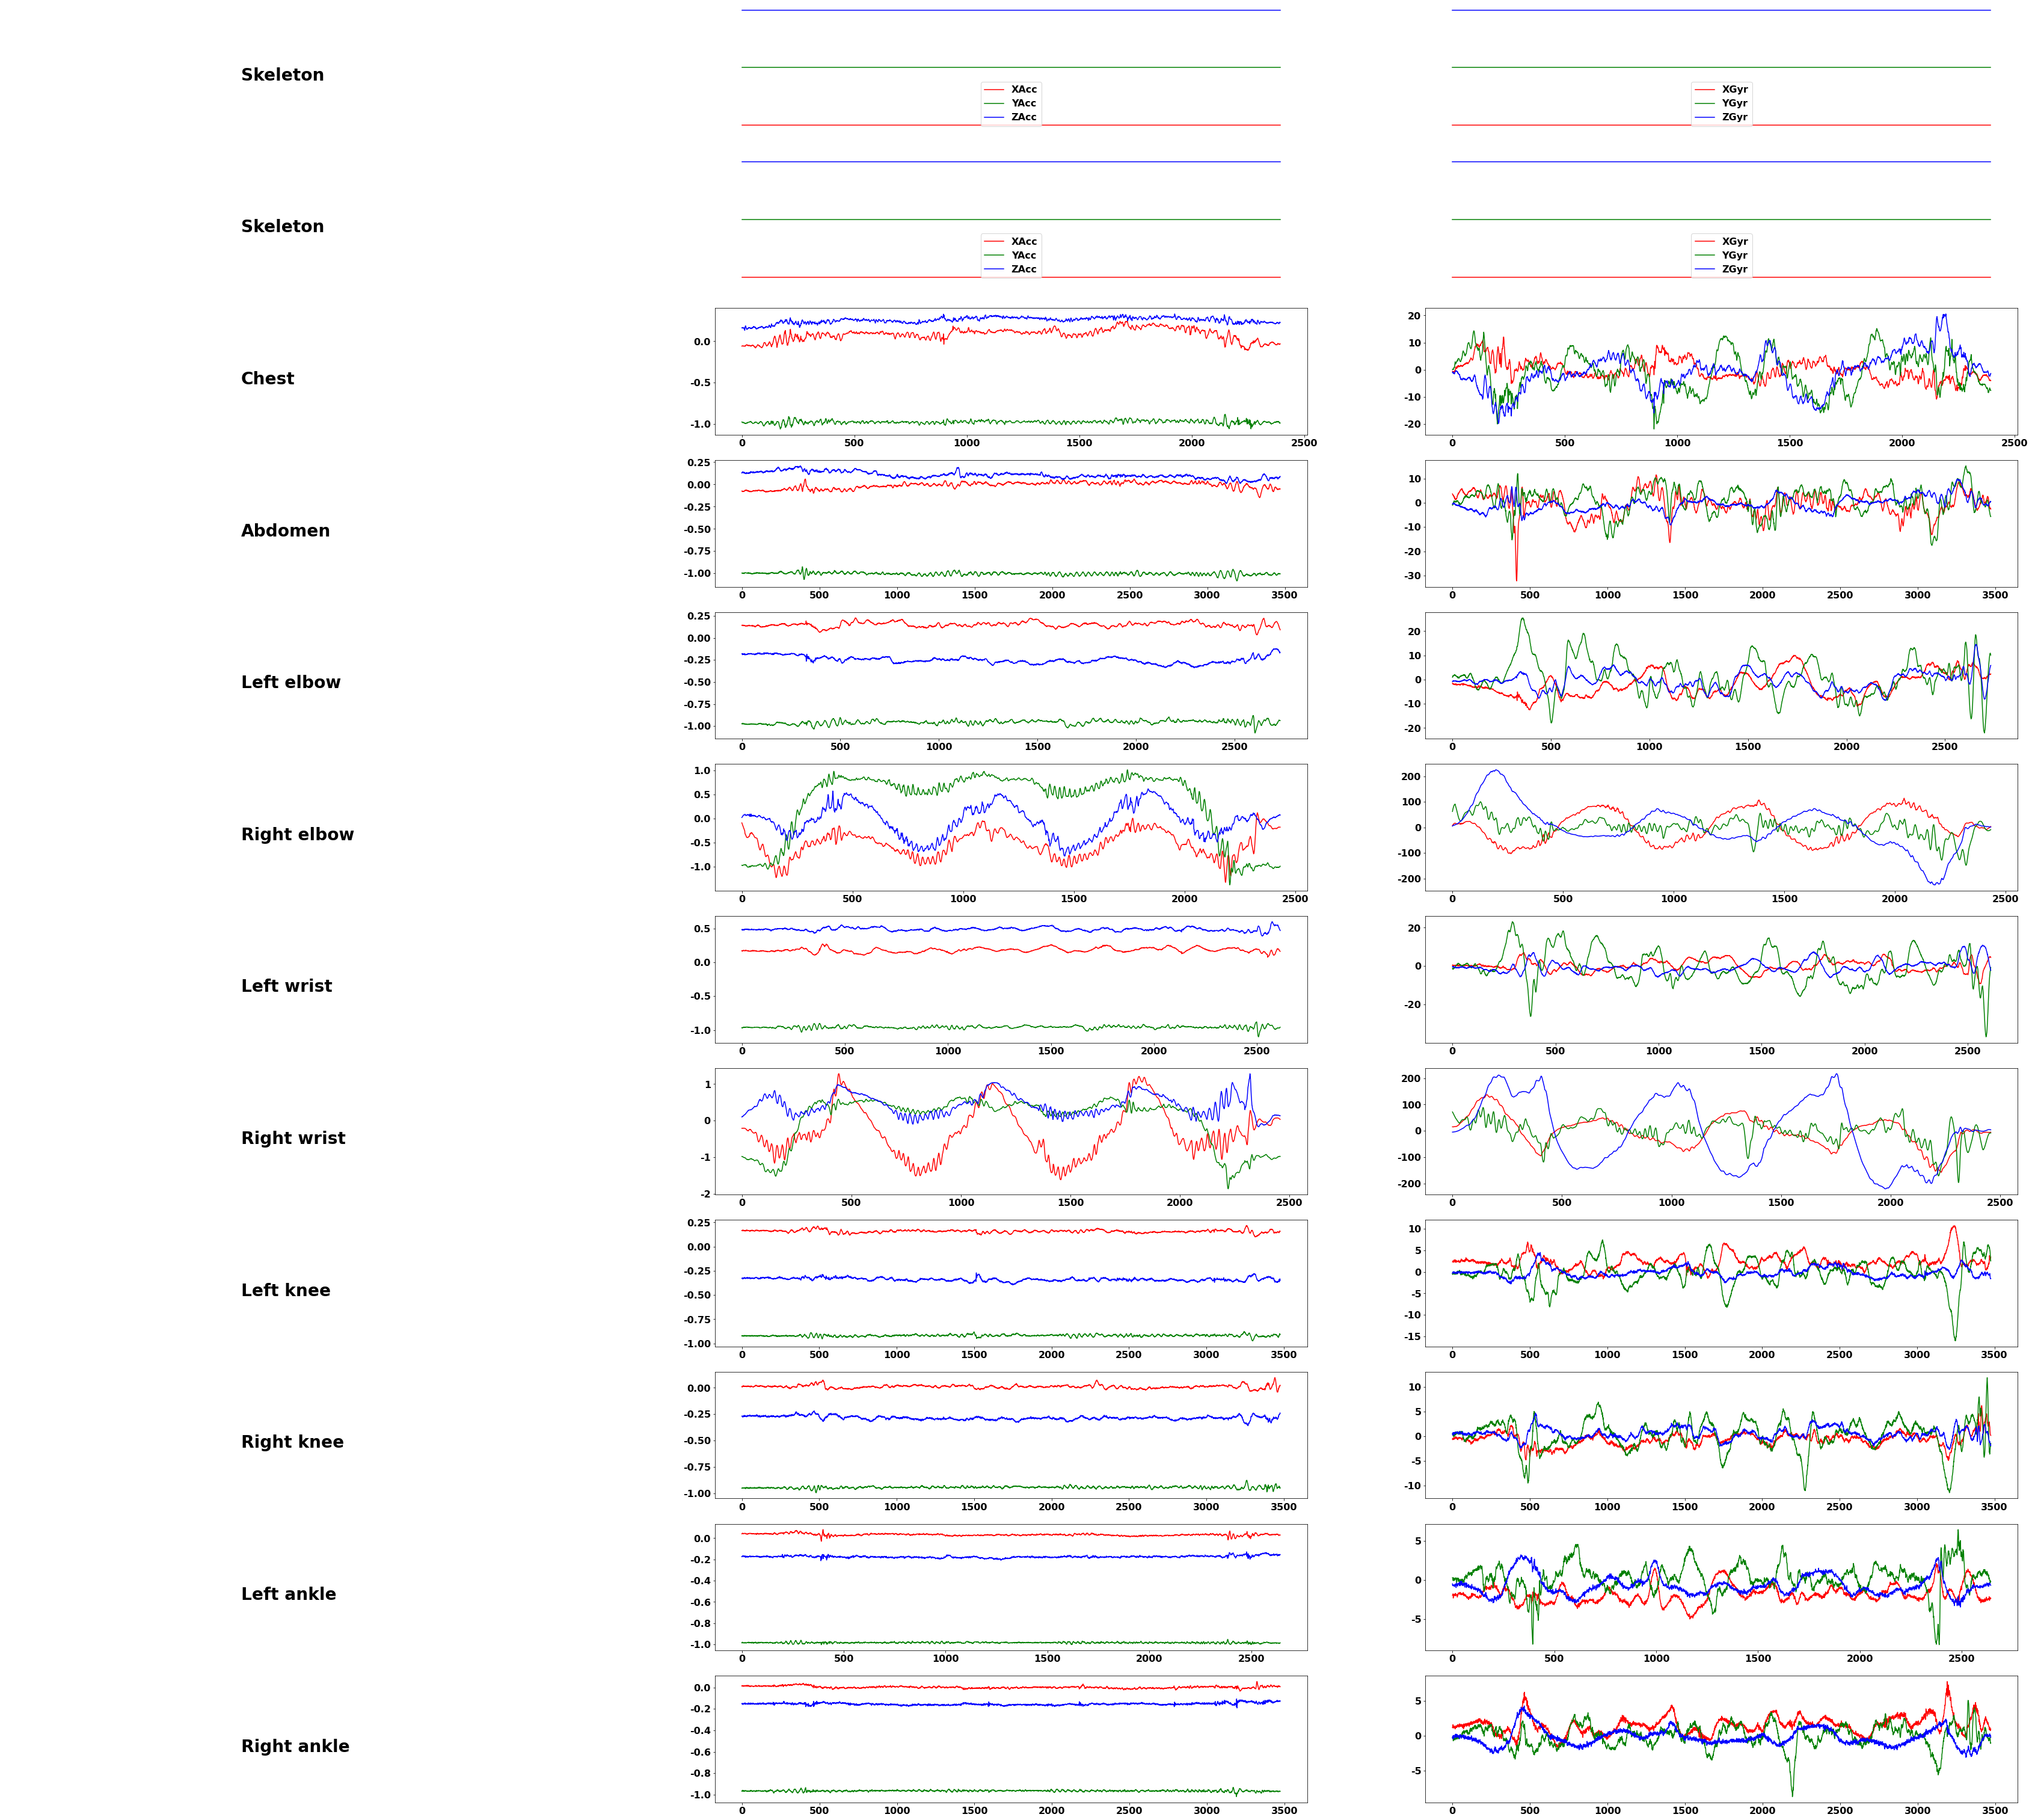

In [33]:
## Sensor Data Visualization 


font = {'family' : 'Sans',
    'weight' : 'bold',
    'size'  : '16'}
plt.rc('font', **font)      
plt.rc('axes', unicode_minus=False) 

Data = scio.loadmat('E:\THESIS\CZU-MHAD\sensor_mat\cx_a1_t1.mat')

sensors = Data['sensor']

#----------------------------------------------------------------------

plt.figure(figsize=(60, 55))
plt.subplot(12,3,1)
plt.text(0.4,0.4,"Skeleton",fontsize=28)
plt.axis('off')

#-----------------------------------------------------------------------

plt.subplot(12,3,2)
plt.plot([0,1], [1,1], color='red',label='XAcc')
plt.plot([0,1], [2,2], color='green', label='YAcc')
plt.plot([0,1], [3,3], color='blue',  label='ZAcc')
plt.legend()
plt.axis('off') 

#------------------------------------------------------------------------

plt.subplot(12,3,3)
plt.plot([0,1], [1,1], color='red',label='XGyr')
plt.plot([0,1], [2,2], color='green', label='YGyr')
plt.plot([0,1], [3,3], color='blue',label='ZGyr')
plt.legend()
plt.axis('off') 

#------------------------------------------------------------------------

plt.subplot(12,3,4)
plt.text(0.4,0.4,"Skeleton",fontsize=28)
plt.axis('off')

#------------------------------------------------------------------------

plt.subplot(12,3,5)
plt.plot([0,1], [1,1], color='red',label='XAcc')
plt.plot([0,1], [2,2], color='green', label='YAcc')
plt.plot([0,1], [3,3], color='blue',label='ZAcc')
plt.legend()
plt.axis('off') 

#------------------------------------------------------------------------

plt.subplot(12,3,6)
plt.plot([0,1], [1,1], color='red',label='XGyr')
plt.plot([0,1], [2,2], color='green', label='YGyr')
plt.plot([0,1], [3,3], color='blue',label='ZGyr')
plt.legend()
plt.axis('off') 

####################################################################################
Content00 = sensors[0,0]
XAcc00,YAcc00,ZAcc00,XGyr00,YGyr00,ZGyr00 = np.split(Content00[:,0:6],6,axis=1)
IdS = range(0,len(XAcc00))

plt.subplot(12,3,7)
plt.text(0.4,0.4,'Chest',fontsize=28)
plt.axis('off')

plt.subplot(12,3,8)
plt.plot(IdS, XAcc00, color='red',label='XAcc')
plt.plot(IdS, YAcc00, color='green', label='YAcc')
plt.plot(IdS, ZAcc00, color='blue',label='ZAcc')

plt.subplot(12,3,9)
plt.plot(IdS, XGyr00, color='red',label='XGyr')
plt.plot(IdS, YGyr00, color='green', label='YGyr')
plt.plot(IdS, ZGyr00, color='blue',label='ZGyr')

Content01 = sensors[1,0]
XAcc01,YAcc01,ZAcc01,XGyr01,YGyr01,ZGyr01 = np.split(Content01[:,0:6],6,axis=1)
IdS = range(0,len(XAcc01))

plt.subplot(12,3,10)
plt.text(0.4,0.4,'Abdomen',fontsize=28)
plt.axis('off')

plt.subplot(12,3,11)
plt.plot(IdS, XAcc01, color='red',label='XAcc')
plt.plot(IdS, YAcc01, color='green', label='YAcc')
plt.plot(IdS, ZAcc01, color='blue',label='ZAcc')

plt.subplot(12,3,12)
plt.plot(IdS, XGyr01, color='red',label='XGyr')
plt.plot(IdS, YGyr01, color='green', label='YGyr')
plt.plot(IdS, ZGyr01, color='blue',label='ZGyr')

####################################################################################	

Content02 = sensors[2,0]
XAcc02,YAcc02,ZAcc02,XGyr02,YGyr02,ZGyr02 = np.split(Content02[:,0:6],6,axis=1)
IdS = range(0,len(XAcc02))

plt.subplot(12,3,13)
plt.text(0.4,0.4,'Left elbow',fontsize=28)
plt.axis('off')

plt.subplot(12,3,14)	
plt.plot(IdS, XAcc02, color='red',label='XAcc')
plt.plot(IdS, YAcc02, color='green', label='YAcc')
plt.plot(IdS, ZAcc02, color='blue',label='ZAcc')

plt.subplot(12,3,15)
plt.plot(IdS, XGyr02, color='red',label='XGyr')
plt.plot(IdS, YGyr02, color='green', label='YGyr')
plt.plot(IdS, ZGyr02, color='blue',label='ZGyr')

Content04 = sensors[4,0]
XAcc04,YAcc04,ZAcc04,XGyr04,YGyr04,ZGyr04 = np.split(Content04[:,0:6],6,axis=1)
IdS = range(0,len(XAcc04))

plt.subplot(12,3,16)
plt.text(0.4,0.4,'Right elbow',fontsize=28)
plt.axis('off')   

plt.subplot(12,3,17)
plt.plot(IdS, XAcc04, color='red',label='XAcc')
plt.plot(IdS, YAcc04, color='green', label='YAcc')
plt.plot(IdS, ZAcc04, color='blue',label='ZAcc')

plt.subplot(12,3,18)
plt.plot(IdS, XGyr04, color='red',label='XGyr')
plt.plot(IdS, YGyr04, color='green', label='YGyr')
plt.plot(IdS, ZGyr04, color='blue',label='ZGyr')

Content03 = sensors[3,0]
XAcc03,YAcc03,ZAcc03,XGyr03,YGyr03,ZGyr03 = np.split(Content03[:,0:6],6,axis=1)
IdS = range(0,len(XAcc03))

plt.subplot(12,3,19)
plt.text(0.4,0.4,'Left wrist',fontsize=28)
plt.axis('off')

plt.subplot(12,3,20)	
plt.plot(IdS, XAcc03, color='red',label='XAcc')
plt.plot(IdS, YAcc03, color='green', label='YAcc')
plt.plot(IdS, ZAcc03, color='blue',label='ZAcc')

plt.subplot(12,3,21)
plt.plot(IdS, XGyr03, color='red',label='XGyr')
plt.plot(IdS, YGyr03, color='green', label='YGyr')
plt.plot(IdS, ZGyr03, color='blue',label='ZGyr')


####################################################################################

Content05 = sensors[5,0]
XAcc05,YAcc05,ZAcc05,XGyr05,YGyr05,ZGyr05 = np.split(Content05[:,0:6],6,axis=1)
IdS = range(0,len(XAcc05))

plt.subplot(12,3,22)  # multiply with 3
plt.text(0.4,0.4,'Right wrist',fontsize=28)
plt.axis('off')

plt.subplot(12,3,23)
plt.plot(IdS, XAcc05, color='red',label='XAcc')
plt.plot(IdS, YAcc05, color='green', label='YAcc')
plt.plot(IdS, ZAcc05, color='blue',label='ZAcc')

plt.subplot(12,3,24)
plt.plot(IdS, XGyr05, color='red',label='XGyr')
plt.plot(IdS, YGyr05, color='green', label='YGyr')
plt.plot(IdS, ZGyr05, color='blue',label='ZGyr')

####################################################################################

Content06 = sensors[6,0]
XAcc06,YAcc06,ZAcc06,XGyr06,YGyr06,ZGyr06 = np.split(Content06[:,0:6],6,axis=1)
IdS = range(0,len(XAcc06))

plt.subplot(12,3,25)
plt.text(0.4,0.4,'Left knee',fontsize=28)
plt.axis('off')

plt.subplot(12,3,26)
plt.plot(IdS, XAcc06, color='red',label='XAcc')
plt.plot(IdS, YAcc06, color='green', label='YAcc')
plt.plot(IdS, ZAcc06, color='blue',label='ZAcc')

plt.subplot(12,3,27)
plt.plot(IdS, XGyr06, color='red',label='XGyr')
plt.plot(IdS, YGyr06, color='green', label='YGyr')
plt.plot(IdS, ZGyr06, color='blue', label='ZGyr')

Content08 = sensors[8,0]
XAcc08,YAcc08,ZAcc08,XGyr08,YGyr08,ZGyr08 = np.split(Content08[:,0:6],6,axis=1)
IdS = range(0,len(XAcc08))

plt.subplot(12,3,28)
plt.text(0.4,0.4,'Right knee',fontsize=28)
plt.axis('off')

plt.subplot(12,3,29)
plt.plot(IdS, XAcc08, color='red',label='XAcc')
plt.plot(IdS, YAcc08, color='green', label='YAcc')
plt.plot(IdS, ZAcc08, color='blue',label='ZAcc')

plt.subplot(12,3,30)
plt.plot(IdS, XGyr08, color='red',label='XGyr')
plt.plot(IdS, YGyr08, color='green', label='YGyr')
plt.plot(IdS, ZGyr08, color='blue',label='ZGyr')

####################################################################################

Content07 = sensors[7,0]
XAcc07,YAcc07,ZAcc07,XGyr07,YGyr07,ZGyr07 = np.split(Content07[:,0:6],6,axis=1)
IdS = range(0,len(XAcc07))

plt.subplot(12,3,31)
plt.text(0.4,0.4,'Left ankle',fontsize=28)
plt.axis('off')

plt.subplot(12,3,32)
plt.plot(IdS, XAcc07, color='red',label='XAcc')
plt.plot(IdS, YAcc07, color='green', label='YAcc')
plt.plot(IdS, ZAcc07, color='blue',  label='ZAcc')

plt.subplot(12,3,33)
plt.plot(IdS, XGyr07, color='red',label='XGyr')
plt.plot(IdS, YGyr07, color='green', label='YGyr')
plt.plot(IdS, ZGyr07, color='blue',label='ZGyr')

Content09 = sensors[9,0]
XAcc09,YAcc09,ZAcc09,XGyr09,YGyr09,ZGyr09 = np.split(Content09[:,0:6],6,axis=1)
IdS = range(0,len(XAcc09))

plt.subplot(12,3,34)
plt.text(0.4,0.4,'Right ankle',fontsize=28)
plt.axis('off')

plt.subplot(12,3,35)	
plt.plot(IdS, XAcc09, color='red',label='XAcc')
plt.plot(IdS, YAcc09, color='green', label='YAcc')
plt.plot(IdS, ZAcc09, color='blue',label='ZAcc')

plt.subplot(12,3,36)
plt.plot(IdS, XGyr09, color='red',label='XGyr')
plt.plot(IdS, YGyr09, color='green', label='YGyr')
plt.plot(IdS, ZGyr09, color='blue',label='ZGyr')

plt.show()

In [65]:
x = loadmat('E:\THESIS\CZU-MHAD\skeleton_mat\cx_a1_t1')

df = pd.DataFrame.from_dict(x, orient='index').T

print("Shape= ", df.shape)
print("Feature Name: ", df.columns)

print(df.iloc[0]['skeleton'].shape)

skel = df.iloc[0]['skeleton']

Shape=  (1, 4)
Feature Name:  Index(['__header__', '__version__', '__globals__', 'skeleton'], dtype='object')
(188, 100)


In [75]:
font = {'family' : 'Sans',
    'weight' : 'normal',
    'size'  : '10'}
plt.rc('font', **font)      
plt.rc('axes', unicode_minus=False) 

2
13
17
21
4
21
6
21
7
8
23
22
21
10
11
12
25
24
14
15
16
18
19
20


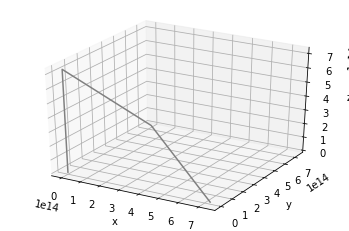

In [94]:
total_joint = 25
J = [[1,  1,  1,  2,  3,  3,  5  ,5   ,6  ,7  ,7   ,8   ,9  ,9  ,10  ,11  ,11  ,12  ,13  ,14  ,15  ,17  ,18  ,19],
     [2,  13, 17, 21, 4,  21, 6  ,21  ,7  ,8  ,23  ,22  ,21 ,10 ,11  ,12  ,25  ,24  ,14  ,15  ,16  ,18  ,19  ,20]]

(num_frame,k) = skel.shape

for i in range(1):
    
    joint = skel[i,:]
    ee = joint.reshape(4,25)     # ee is a 2d array of shape 4 X 25
    #print(ee)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(ee[:,0], ee[:,1], ee[:,2], 'gray')
    
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    #print(len(J[1]))
    
    for j in range(len(J[1])):
        
        print(J[1][j])
        
        idx0 = J[0][j] - 1
        idx1 = J[1][j] - 1
        
        point1 = ee[ 0:3, idx0]
        point2 = ee[ 0:3, idx1]
       
